In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import umap
 
warnings.filterwarnings('ignore')

In [2]:
customers= pd.read_csv('Mall_Customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customers= customers.drop('CustomerID', axis=1)

In [4]:
customers.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
customers['Is_male']= pd.get_dummies(customers['Gender'], drop_first=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d1c7550>,
      dtype=object)

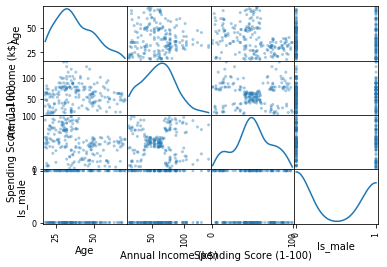

In [6]:
pd.plotting.scatter_matrix(customers, alpha=0.4, diagonal='kde')

In [7]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
Is_male                   200 non-null uint8
dtypes: int64(3), object(1), uint8(1)
memory usage: 6.6+ KB


In [8]:
#Normalize data
customers['boxcox_age'], _=boxcox(customers.Age)
customers['boxcox_income'], _=boxcox(customers['Annual Income (k$)'])
customers['boxcox_spending'], _=boxcox(customers['Spending Score (1-100)'])
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Is_male,boxcox_age,boxcox_income,boxcox_spending
0,Male,19,15,39,1,3.691442,7.409624,24.128630
1,Male,21,15,81,1,3.847430,7.409624,45.328722
2,Female,20,16,6,0,3.771098,7.793130,4.135102
3,Female,23,16,77,0,3.991239,7.793130,43.408853
4,Female,31,17,40,0,4.476951,8.168337,24.667863


In [10]:
#No outliers/missing values- preprocess X as normalized features
X=customers.iloc[:, 4:]
#Keep a standardized version handy
X_std=StandardScaler().fit_transform(X)

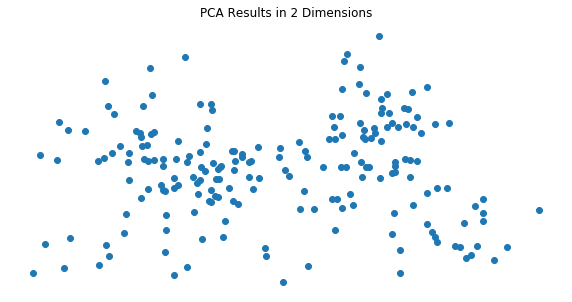

In [11]:
#Transform data for visualization of clusters using PCA
pca_results=PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.scatter(pca_results[:, 0], pca_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.title('PCA Results in 2 Dimensions')
plt.axis('off')
plt.show()

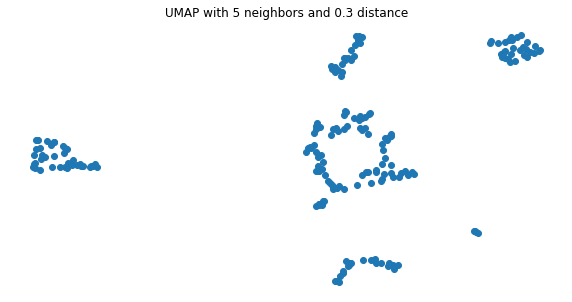

In [12]:
#Transform data for visualization of clusters using UMAP
umap_clusters=umap.UMAP(n_neighbors=5, min_dist=0.3).fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.scatter(umap_clusters[:, 0], umap_clusters[:, 1])
plt.xticks([])
plt.yticks([])
plt.title('UMAP with 5 neighbors and 0.3 distance')
plt.axis('off')
plt.show()

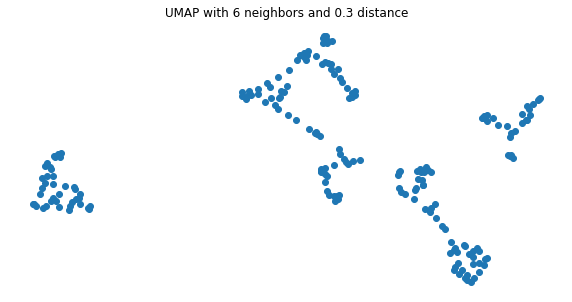

In [13]:
umap_clusters=umap.UMAP(n_neighbors=6, min_dist=0.3).fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.scatter(umap_clusters[:, 0], umap_clusters[:, 1])
plt.xticks([])
plt.yticks([])
plt.title('UMAP with 6 neighbors and 0.3 distance')
plt.axis('off')
plt.show()

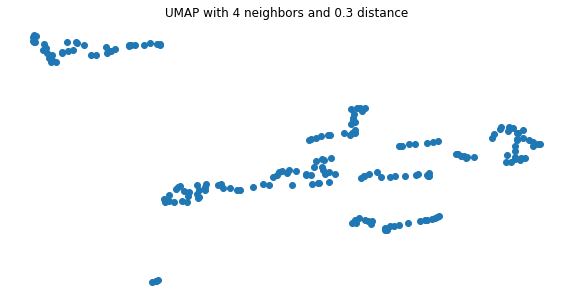

In [14]:
umap_clusters=umap.UMAP(n_neighbors=4, min_dist=0.3).fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.scatter(umap_clusters[:, 0], umap_clusters[:, 1])
plt.xticks([])
plt.yticks([])
plt.title('UMAP with 4 neighbors and 0.3 distance')
plt.axis('off')
plt.show()

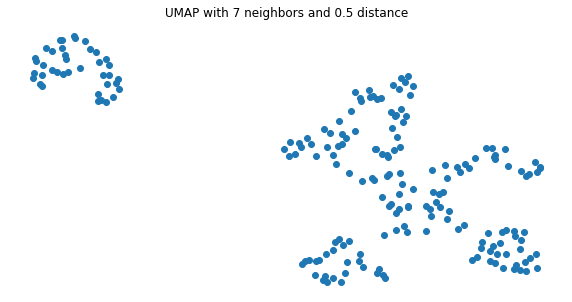

In [15]:
umap_clusters=umap.UMAP(n_neighbors=7, min_dist=0.5).fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.scatter(umap_clusters[:, 0], umap_clusters[:, 1])
plt.xticks([])
plt.yticks([])
plt.title('UMAP with 7 neighbors and 0.5 distance')
plt.axis('off')
plt.show()

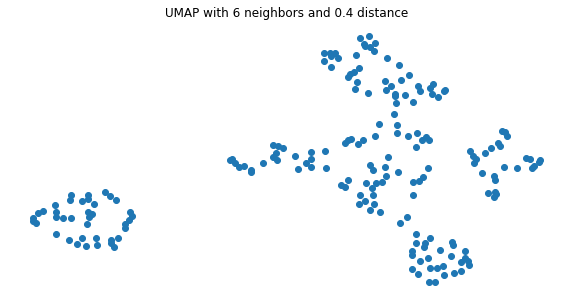

In [16]:
umap_clusters=umap.UMAP(n_neighbors=6, min_dist=0.5).fit_transform(X_std)

plt.figure(figsize=(10,5))
plt.scatter(umap_clusters[:, 0], umap_clusters[:, 1])
plt.xticks([])
plt.yticks([])
plt.title('UMAP with 6 neighbors and 0.4 distance')
plt.axis('off')
plt.show()

The UMAP clusters consistently generate 5-6 linearly separable clusters. Running each type of clustering method will help determine which clusters are densest and most separable. 

In [17]:
#Score model
for n_clust in range(3, 8):
    kmeans= KMeans(n_clusters=n_clust)
    kmeans_clusters=kmeans.fit_predict(X_std)
    print('Silhouette Score of {0} KMeans model : {1:.3f}'.format(n_clust, silhouette_score(
    X_std, kmeans_clusters, metric='euclidean')))

Silhouette Score of 3 KMeans model : 0.360
Silhouette Score of 4 KMeans model : 0.404
Silhouette Score of 5 KMeans model : 0.432
Silhouette Score of 6 KMeans model : 0.456
Silhouette Score of 7 KMeans model : 0.416


6 cluster solution performs best for k-means. Comparing to other models to see which is optimal cluster method.

Text(0.5, 1.0, 'Elbow for KMeans clustering')

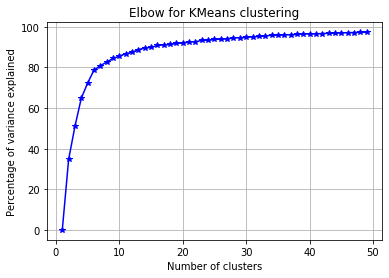

In [42]:
#Construct elbow plot to verify cluster choice
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(1,50)
KM = [KMeans(n_clusters=k).fit(X_std) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(X_std, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X_std.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X_std)**2)/X_std.shape[0]
bss = tss-wcss

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')

In [30]:
#Testing Agglomerative Clustering
# Define parameters
linkages=['complete', 'average']
affinities=['l2', 'l1', 'cosine']
#Loop through combinations
for link in linkages:
    for dist in affinities:
        agg= AgglomerativeClustering(linkage= link, 
                                     affinity=dist, 
                                     n_clusters=6)
        agg_clusters=agg.fit_predict(X_std)
        print('Silhouette score of cluster method with {0} linkage type and {1} distance: {2:.3f}'.format(link, dist, silhouette_score(
    X,agg_clusters)
             )
             )
agg= AgglomerativeClustering(linkage= 'ward', n_clusters=6)
agg_clusters=agg.fit_predict(X_std)
print('Silhouette score of Ward linkage and Euclidean distance: {2:.3f}'.format(link, dist, silhouette_score(
    X,agg_clusters)))

Silhouette score of cluster method with complete linkage type and l2 distance: 0.306
Silhouette score of cluster method with complete linkage type and l1 distance: 0.202
Silhouette score of cluster method with complete linkage type and cosine distance: 0.244
Silhouette score of cluster method with average linkage type and l2 distance: 0.107
Silhouette score of cluster method with average linkage type and l1 distance: 0.509
Silhouette score of cluster method with average linkage type and cosine distance: 0.231
Silhouette score of Ward linkage and Euclidean distance: 0.301


In [19]:
eps= np.arange(1, 6)
min_samples=np.arange(1, 7)

for ep in eps:
    for num_samples in min_samples:
        try:
            dbscan=DBSCAN(eps=ep, min_samples=num_samples)
            dbscan_clusters=dbscan.fit_predict(X_std)
            print('Silhouette Score of model with epsilon value {} and {} minPts: {:.3f}'.format(
            ep, num_samples, silhouette_score(X_std, dbscan_clusters, metric='euclidean')))
        except ValueError:
            pass

Silhouette Score of model with epsilon value 1 and 1 minPts: 0.203
Silhouette Score of model with epsilon value 1 and 2 minPts: 0.281
Silhouette Score of model with epsilon value 1 and 3 minPts: 0.281
Silhouette Score of model with epsilon value 1 and 4 minPts: 0.281
Silhouette Score of model with epsilon value 1 and 5 minPts: 0.281
Silhouette Score of model with epsilon value 1 and 6 minPts: 0.296


None of the DBSCAN combinations outperformed previous solutions, checking Gaussian Mixture Models.

In [31]:
gmm=GaussianMixture(n_components=6)

gmm_clusters=gmm.fit_predict(X_std)

print('GMM silhouette score: {:.3f}'.format(silhouette_score(X_std, gmm_clusters)))

GMM silhouette score: 0.440


Among all methods and combinations, the best option is Agglomerative Clustering with average linkage and l1 distance.

In [32]:
#Use best silhouette score model
agg= AgglomerativeClustering(linkage= 'average', affinity='l1', n_clusters=6)
agg_clusters=agg.fit_predict(X_std)

In [35]:
#Inspect cluster averages
cluster_group_avgs= customers.iloc[:, 1:].groupby(agg_clusters).mean()
cluster_group_avgs= cluster_group_avgs.append(customers.mean(), ignore_index=True)
cluster_group_avgs=cluster_group_avgs.rename(index={6:'Averages'})
cluster_group_avgs

,Age,Annual Income (k$),Spending Score (1-100),Is_male,boxcox_age,boxcox_income,boxcox_spending
0,42.882353,54.882353,48.694118,0.400000,4.908766,19.190120,29.216133
1,41.647059,88.735294,16.764706,0.558824,4.919848,26.790947,11.022772
2,46.611111,25.444444,18.722222,0.388889,5.136581,10.997574,12.113919
3,25.272727,25.727273,79.363636,0.409091,4.115485,11.050687,44.492373
4,32.692308,86.538462,82.128205,0.461538,4.556825,26.328490,45.825238
5,19.500000,15.500000,22.500000,0.500000,3.731270,7.601377,14.131866
Averages,38.850000,60.560000,50.200000,0.440000,4.763489,20.125689,29.352382


Cluster 0 is categorized by older, medium income earners that spend less who are majority female.

Cluster 1 is categorized by young, high income earners with an even gender mix.

Cluster 2 is categorized by older, high income earners with low spending, mostly male.

Cluster 3 is categorized by middle aged, high income earners with very high spending scores.

Cluster 4 is categorized by older, low income earners with very low spending habits.

Cluster 5 is categorized by very young, low income, low spending behaviors. 

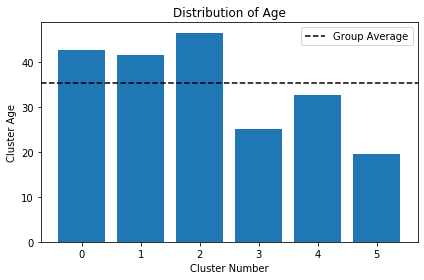

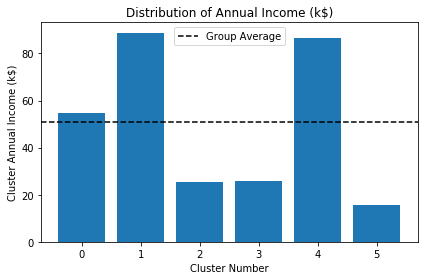

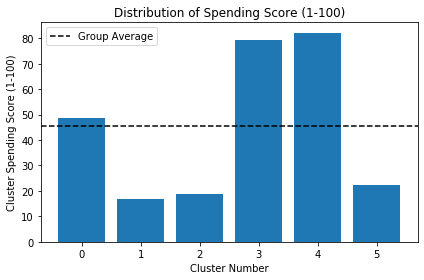

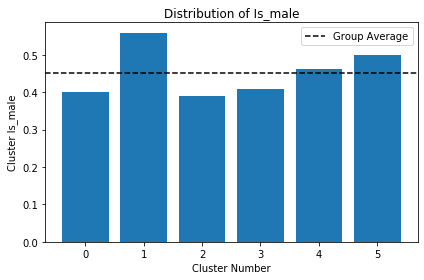

In [60]:
#Plot cluster averages 
for i, col in enumerate(cluster_group_avgs.iloc[:6, :4]):
    plt.figure(i)
    plt.bar(cluster_group_avgs.index[:6], cluster_group_avgs[col][:6])
    plt.axhline(cluster_group_avgs[col].mean(), linestyle= '--', color='k', label='Group Average')
    plt.title('Distribution of '+str(col))
    plt.legend()
    plt.ylabel('Cluster ' +str(col))
    plt.xlabel('Cluster Number')
    plt.tight_layout()
    

Text(0, 0.5, 'Count')

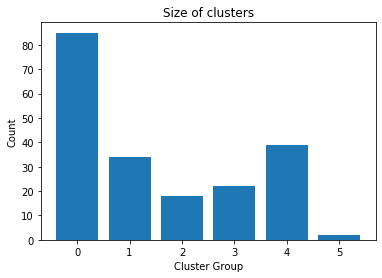

In [43]:
plt.bar(customers.iloc[:, 1:].groupby(agg_clusters).count().index, customers.iloc[:, 1:].groupby(agg_clusters).count().iloc[:, 0])
plt.title('Size of clusters')
plt.xlabel('Cluster Group')
plt.ylabel('Count')

The clusters are very uneven in size, with cluster 0 dominating the majority of points. 

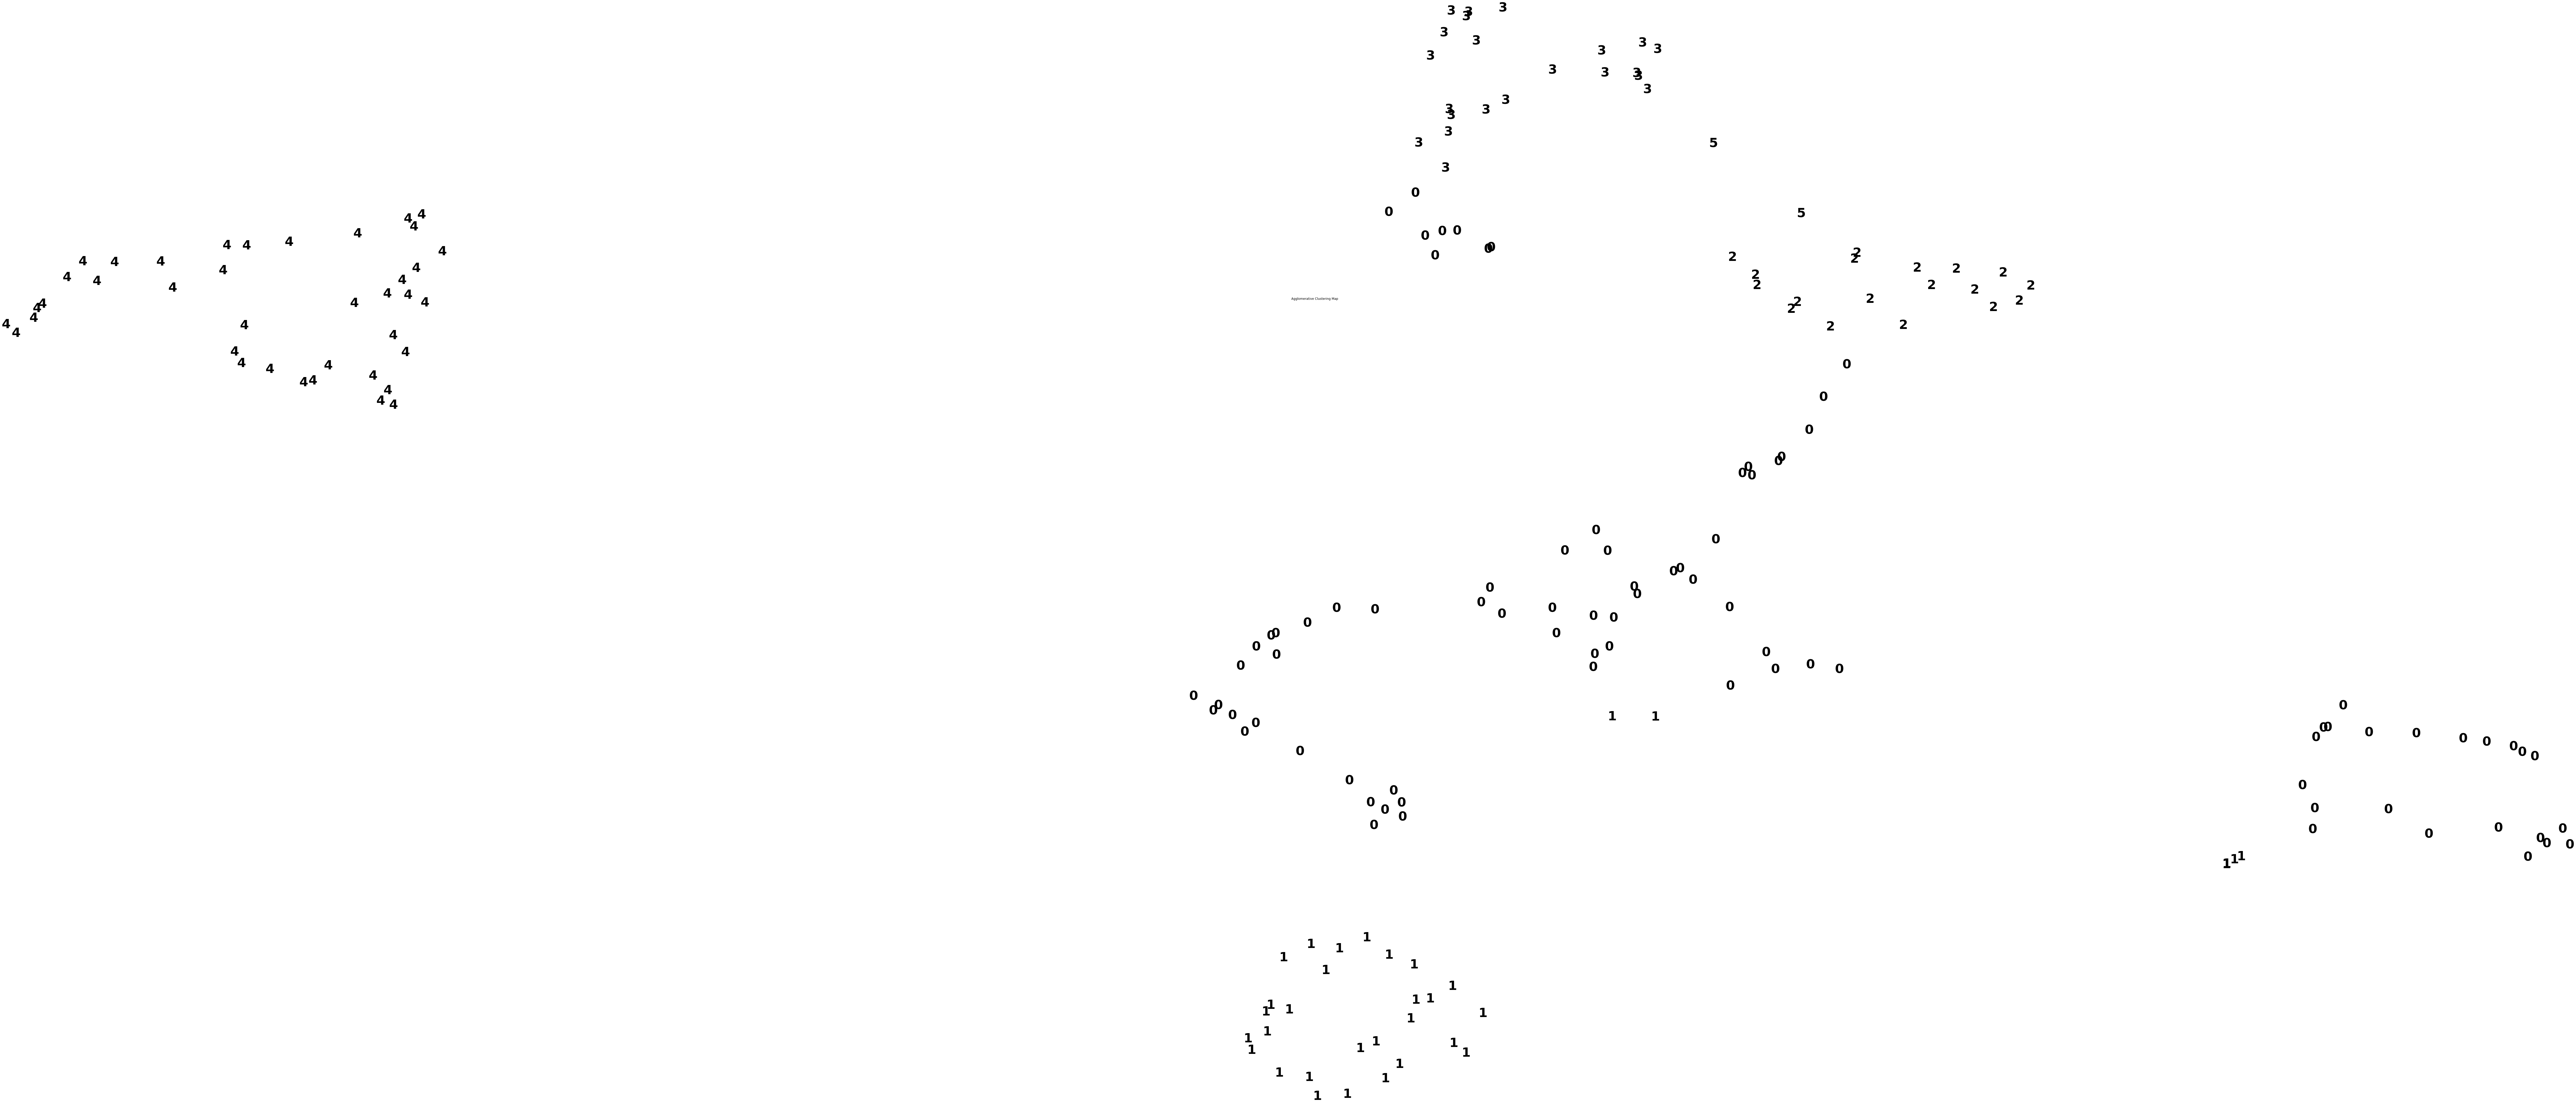

In [83]:
#Map clusters
umap_clusters=umap.UMAP(n_neighbors=6, min_dist=0.3).fit_transform(X_std)
colors='rbgyk'
plt.figure(figsize=(10, 5))
for i in range(umap_clusters.shape[0]):
    plt.text(umap_clusters[i, 0], umap_clusters[i, 1], 
             s=str(agg_clusters[i]),
            fontdict={'weight': 'bold', 'size': 50}
            )
plt.xticks([])
plt.yticks([])
plt.title('Agglomerative Clustering Map')
plt.axis('off')
plt.show()

UMAP's dimensionality reduction helped determine 6 would be an approximate guess for the proper number of clusters, which was verified by the elbow plot and the highest available silhouette score. By interpreting the best clustering method's results, we can pinpoint customer segments that behave uniquely, allowing marketers to individualize ads. When marketing to a customer in cluster 3, more high end luxury products are in their spending range, while the young, low income group in cluster 5 would have less income and willingness to spend, so a business may be better off selling them cheaper goods or focusing their efforts on high spending clusters. 